# Models summary


### Useful modules - Import

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.scorer import SCORERS

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Datasets

In [80]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_friedman1
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digitsDataset = load_digits()

digitsX, digitsY = digitsDataset.data, digitsDataset.target
digitsY_imbalanced = digitsY.copy()
digitsY_imbalanced[digitsY_imbalanced != 1] = 0
digitsX_train, digitsX_test, digitsY_train, digitsY_test = train_test_split(digitsX, digitsY, random_state = 0)
digitsX_imbalanced_train, digitsX_imbalanced_test, digitsY_imbalanced_train, digitsY_imbalanced_test = train_test_split(digitsX, digitsY_imbalanced, random_state = 0)




pca = PCA(n_components=2).fit_transform(digitsX)

pcadigitsX_imbalanced_train, pcadigitsX_imbalanced_test, pcadigitsY_imbalanced_train, pcadigitsY_imbalanced_test = train_test_split(pca, digitsY_imbalanced, random_state = 0)

In [81]:
pcadigitsX_imbalanced_train

array([[-12.93768391, -11.09836742],
       [ -8.44856371,   0.66485739],
       [-14.60662912,  13.34412581],
       ...,
       [  4.51288833, -19.18830412],
       [  3.77395186, -16.61109389],
       [ -3.62546153,  -2.53377494]])

## Supervised learning

### Regresors


### Dummy regressor

In [ ]:
from sklearn.dummy import DummyRegressor




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures


from sklearn.svm import LinearSVC

## Classifiers 


### Dummy 

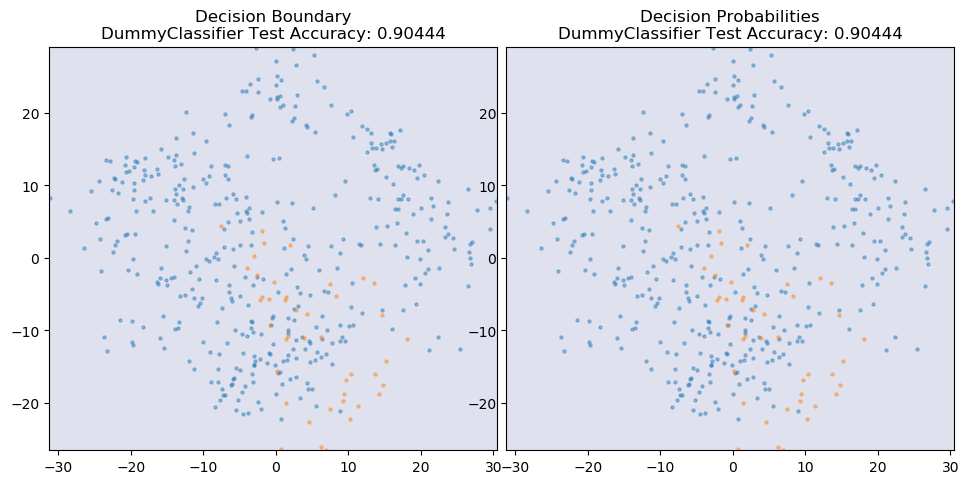

In [82]:
from sklearn.dummy import DummyClassifier

# Therefore the dummy 'most_frequent' classifier always predicts class 0
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(digitsX_imbalanced_train, digitsY_imbalanced_train)
y_dummy_predictions = dummy_majority.predict(digitsX_imbalanced_test)
y_dummy_predictions

dummy_majority.score(digitsX_imbalanced_test,digitsY_imbalanced_test)

plot_mushroom_boundary(pcadigitsX_imbalanced_test,pcadigitsY_imbalanced_test,dummy_majority)


## Logistic regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9133333333333333
0.9133333333333333


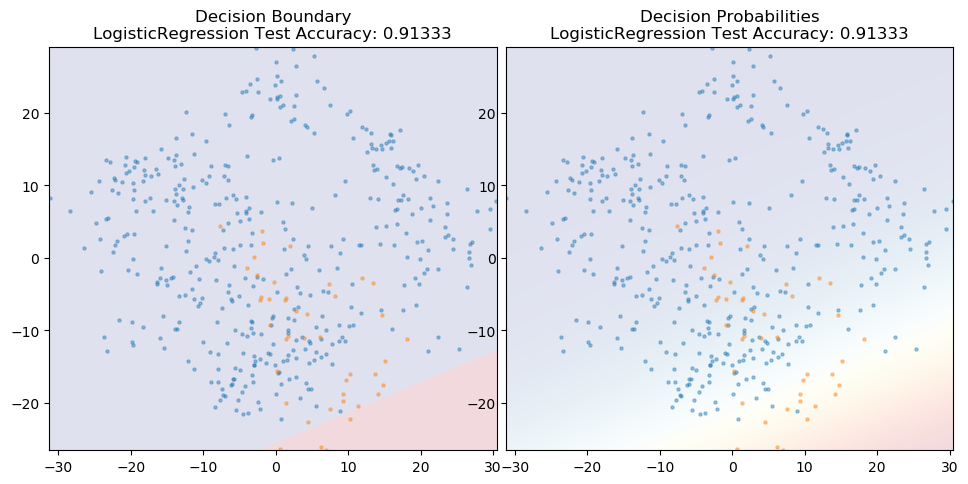

In [84]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(pcadigitsX_imbalanced_train, digitsY_imbalanced_train)
print(lr.score(pcadigitsX_imbalanced_test, digitsY_imbalanced_test))

lr = LogisticRegression(C=0.5,random_state = 0)
lr.fit(pcadigitsX_imbalanced_train, digitsY_imbalanced_train)
print(lr.score(pcadigitsX_imbalanced_test, digitsY_imbalanced_test))

plot_mushroom_boundary(pcadigitsX_imbalanced_test,pcadigitsY_imbalanced_test,lr)

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 0)
dt.fit(digitsX_imbalanced_train, digitsY_imbalanced_train)
print(dt.score(digitsX_imbalanced_test, digitsY_imbalanced_test))

dt = DecisionTreeClassifier(max_depth=3,random_state = 0)
dt.fit(digitsX_imbalanced_train, digitsY_imbalanced_train)
print(dt.score(digitsX_imbalanced_test, digitsY_imbalanced_test))

0.9755555555555555
0.9622222222222222


## Suppor vector classifier

In [42]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1,random_state = 0).fit(digitsX_imbalanced_train, digitsY_imbalanced_train)
print(svm.score(digitsX_imbalanced_test, digitsY_imbalanced_test))

svmRbf = SVC(kernel='rbf', C=1,random_state = 0).fit(digitsX_imbalanced_train, digitsY_imbalanced_train)
print(svmRbf.score(digitsX_imbalanced_test, digitsY_imbalanced_test))

0.9777777777777777
0.9088888888888889


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier(n_neighbors=5)
knnModel.fit(pcadigitsX_imbalanced_test, digitsY_imbalanced_train)
print(knnModel.score(pcadigitsX_imbalanced_test, digitsY_imbalanced_test))

# knnModel = KNeighborsClassifier(n_neighbors=15)
# knnModel.fit(digitsX_imbalanced_train, digitsY_imbalanced_train)
# print(knnModel.score(digitsX_imbalanced_test, digitsY_imbalanced_test))

plot_mushroom_boundary(pcadigitsX_imbalanced_test,pcadigitsY_imbalanced_test,knnModel)

0.9955555555555555
0.9888888888888889


## Naive bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

multiNBmodel = MultinomialNB()
multiNBmodel.fit(digitsX_imbalanced_train, digitsY_imbalanced_train)
print(multiNBmodel.score(digitsX_imbalanced_test, digitsY_imbalanced_test))

gaussNBmodel = GaussianNB()
gaussNBmodel.fit(digitsX_imbalanced_train, digitsY_imbalanced_train)
print(gaussNBmodel.score(digitsX_imbalanced_test, digitsY_imbalanced_test))

0.9244444444444444
0.5466666666666666


## Random forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(random_state = 0)
randomForestModel.fit(digitsX_imbalanced_train, digitsY_imbalanced_train)
print(randomForestModel.score(digitsX_imbalanced_test, digitsY_imbalanced_test))

randomForestModel = RandomForestClassifier(n_estimators=5, random_state = 0)
randomForestModel.fit(digitsX_imbalanced_train, digitsY_imbalanced_train)
print(randomForestModel.score(digitsX_imbalanced_test, digitsY_imbalanced_test))

0.9844444444444445
0.9911111111111112


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
from sklearn.ensemble import GradientBoostingClassifier


gbClassf = GradientBoostingClassifier(random_state = 0)
gbClassf.fit(digitsX_imbalanced_train, digitsY_imbalanced_train)
print(gbClassf.score(digitsX_imbalanced_test, digitsY_imbalanced_test))

gbClassf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
gbClassf.fit(digitsX_imbalanced_train, digitsY_imbalanced_train)
print(gbClassf.score(digitsX_imbalanced_test, digitsY_imbalanced_test))

0.9888888888888889
0.9311111111111111


# Unsupervised learning

In [63]:
from sklearn.cluster import KMeans

kmeansModel = KMeans(random_state = 0)
kmeansModel.fit(digitsX_imbalanced_train)
print(kmeansModel.score(digitsX_imbalanced_test, digitsY_imbalanced_test))

kmeansModel = KMeans(n_clusters=2, random_state = 0)
kmeansModel.fit(digitsX_imbalanced_train)
print(kmeansModel.score(digitsX_imbalanced_test, digitsY_imbalanced_test))

-328122.7511066232
-486550.1768024024


In [65]:
# from sklearn.cluster import AgglomerativeClustering

# model = AgglomerativeClustering()
# model.fit(digitsX_imbalanced_train)
# print(model.score(digitsX_imbalanced_test, digitsY_imbalanced_test))

# model = AgglomerativeClustering(n_clusters=2)
# model.fit(digitsX_imbalanced_train)
# print(model.score(digitsX_imbalanced_test, digitsY_imbalanced_test))

AttributeError: 'AgglomerativeClustering' object has no attribute 'score'

In [ ]:
# from sklearn.cluster import DBSCAN

# Useful functions

In [73]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y==0,0], X[y==0,1], alpha=0.4, label='Not Ones', s=5)
        plt.scatter(X[y==1,0], X[y==1,1], alpha=0.4, label='Ones', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

In [66]:
np.bincount(digitsY_imbalanced) 
df.duplicated()
df.isnull().any(axis=1)
df.isna().sum()
df.nunique(axis=0)
df = pd.concat((df[cats], df[nums]), axis=1)

df.select_dtypes(include=['object']))
list(df.select_dtypes(exclude=['object']).columns)

array([1615,  182], dtype=int64)